In [1]:
# In this jupyter notebook, we will check the responses collected online for completeness. 
# Also, we will perform some basic sanity checks.
# We will first load the data from a json file and transform it into a pandas data frame. 
# Next, we will make sure to reformat that data frame such that every row is one trial (the json file will give us
# one row for every event)

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cls

# Define a custom color map
top = plt.cm.get_cmap('Greens_r', 128)
bottom = plt.cm.get_cmap('Greys', 128)

shiftcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
shiftcmp = cls.ListedColormap(shiftcolors, name='GnGy')

In [3]:
data = {}
# load data from different components:

# the experimental component
exp_data =  open('../data/jatos_results_02_08.txt')
# unpack the data
for ses, jf in enumerate(exp_data):
    
    # save it to a data frame
    jd = json.loads(jf)
    df = pd.DataFrame(jd)
    df['session'] = ses

    try:
        data = pd.concat([data,df], axis = 0)
        #print('fail')
    except:
        data = df
data.reset_index(drop = True, inplace = True)
data

,view_history,rt,test_part,trial_type,trial_index,time_elapsed,internal_node_id,subject,screenWidth,screenHeight,...,flashTime,trialDuration,trialID,success,touchOn,touchOff,choiceOrder,allTouches,orderResponse,responses
0,"[{""page_index"":0,""viewing_time"":1006.199999995...",1012.8,general_welcome,instructions,0,1016,0.0-0.0,3873,732.0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{""page_index"":0,""viewing_time"":581.6000000014...",1571.9,general_intro,instructions,1,2791,0.0-1.0,3873,732.0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2125.4,NaN,image-button-response,2,5989,0.0-2.0,3873,732.0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,592.6,NaN,image-button-response,3,6593,0.0-3.0,3873,732.0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{""page_index"":0,""viewing_time"":686.2999999970...",688.8,general_intro,instructions,0,693,0.0-0.0,3873,732.0,412.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,NaN,2640.0,NaN,survey-likert,0,2651,0.0-0.0-0.0,3873,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""Q0"":0}"
1535,NaN,940.0,NaN,html-button-response,1,3611,0.0-0.0-1.0,3873,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1536,NaN,1980.0,NaN,html-button-response,2,5596,0.0-0.0-2.0,3873,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1537,NaN,6014.4,NaN,survey-text,3,11637,0.0-0.0-3.0,3873,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# make data across sessions comparable
data.component = data.component.replace({'Inhibition_Serial':'Trials_Serial'})

In [5]:
# save a data frame for only the trials
# jump data
jdf = data[data.component == 'Trials_Jump']
sdf = data[data.component == 'Trials_Serial']

# filter the data for trials that were actually shown (and not skipped)
def filter_trials(data, filter_dict):
    """
    Function to filter the relevant parts out of a large data frame
    
    INPUT:
    data: a pd data frame
    filter_dict: a dictionary containing the name as the column as key and the value that the column should have as value
    
    OUTPUT:
    df: the filtered data frame
    """
    # make a copy of the data file
    df = data.copy()
    
    # loop through the entries of the dictionary
    for filter_crit in filter_dict:
        # this is the actual filter
        df = df[df[filter_crit] == filter_dict[filter_crit]]
        
    # return
    return df

# first, get only trials that were indeed shown
# refactor some old variables
sdf.loc[:,'test_part'] = sdf['test_part'].replace({'Serial-Inhibition': 'trial'})

j_dataShown = filter_trials(jdf, {'trialShown': True, 'test_part': 'trial'}) 
s_dataShown = filter_trials(sdf, {'trialShown': True, 'test_part': 'trial'}) 

# then, get those that were valid
j_data = filter_trials(j_dataShown, {'lateResponse': False, 'earlyResponse': False})
s_data = filter_trials(s_dataShown, {'lateResponse': False, 'orderResponse': True})

# and compute the proportion of valid trials
print('There were {}% invalid trials in the jump task.'.format((len(j_dataShown) - len(j_data))*100/len(j_dataShown)))
print('There were {}% invalid trials in the serial task.'.format((len(s_dataShown) - len(s_data))*100/len(j_dataShown)))


# potentially, we need to reconstruct the time when the go signal was given. 
j_data.loc[np.isnan(j_data.goSignalTime),'goSignalTime'] = j_data[np.isnan(j_data.goSignalTime)].goTime - j_data[np.isnan(j_data.goSignalTime)].rt

There were 1.0309278350515463% invalid trials in the jump task.
There were 5.670103092783505% invalid trials in the serial task.


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


what these columns mean: 
1. 'view_history': for jsPsych instruction components, how long each page was looked at, 
2. 'rt': online computed reaction time
3. 'test_part': with trial type is currently run
4. 'trial_typ': which java script code was used for the event
5. 'trial_index': running number through all events
6. 'time_elapsed': time stamp at the end of the event
7. 'internal_node_id': idk
8. 'subject': jatos worker ID
9. 10. 'screenWidth, screenHeight': information about screen size
11. 'userInfo': device and browser information
12. 'platform': os
13. 'scrPixDepth': pixel Depth
14. 'scrColDepth': color Depth
15. 'scrOrientation': landscape or portrait
16. 'scrResolution': number of pixels per html pixel
17. 'component': the which jatos component is currently active
18. 'stimulus': html for stimulus presentation
19. 'response': jsPsych response for button choices
20. 'session': homebrew id for every component
21. 'button_pressed': jsPsych response for button presses
22. 'touchX': the X coordinate for down presses
23. 'touchY': the Y coordinate for Y presses
24. 'liftX': the X coordinate for fingers lifted from the screen
25. 'liftY': the Y coordniate for fingers lifted from the screen
26. 'js_start': time stamp beginning of the event
27. 'js_touchdown': time stamps of the response
28. 'js_end': time stamp of data writeout
29. 'button0-x': the x coordinate of the first button
30. 'button0-y': the y coordinate of the first button
31. 'all_touches': monitors all touches across the screen
32. 'js_touchup': time stamp of lift
33. 'mt': movement time - duration the finger was in air
34. 'cTouchX': the x coordinate where the center of the screen was touched
35. 'cTouchY': the y coordinate where the center of the screen was touched
36. 'sTouchX': the x coordinate where the side stimulus was touched
37. 'sTouchY': the y coordinate where the side stimulus was touches
38. 'startTime': for jump trials the time when the central dot appeared, for serial trials the time when the first point was touched
40. 'goSignalTime': the time when the central dot jumped to the side in the jump task
41. 'goTime': the time the response started (finger was lifted from the center) in the jump task
42. 'flashOnTime': the time when the flash was shown
43. 'flashOffTime': the time when the flash was turned off again
44. 'waitTime': the time the central dot was on the screen before it was touched
45. 'earlyResponse': if the response was given bfore the go signal
46. 'lateResponse': if the response was too slow
47. 'trialShown': if the trial was presented or not
48. 'errors': information logged to the console
49. 'sideX': X location of the dot on the side
50. 'sideY': Y location of the dot on the side
60. 'centralX': X location of the central point
61. 'centralY': Y location of the central point
62. 'jumpedX': X location of the dot after a jump
63. 'jumpedY': Y location of the dot after a jump
64. 'docTouches': responses across the document (also not in the valid response areas, Jump Task)
65. 'position': if the jump was left or righ
66. 'stimJumped': if the stimulus was shifted a second time or not
67. 'flashShown': if the flash appeared or not
68. 'inwards': if the shift was inwards or outwards
69. 'fixTime': how long the central point was shown before the jump
70. 'flashTime': when the flash was shown
71. 'trialDuration': the maximum duration of the trial (jump task)
72. 'trialID': an individual ID for each trial
73. 'tDur': the duration of the trial (serial task)
74. 'endTime': the time when the data was saved
75. 'respTime': the time when a response was given (jsPsych components)
76. 'success': if the trial was completed
77. 'touchOn': times when touch onsets were detected
78. 'touchOff': times when lifts were detected
79. 'choiceOrder': the order in which the targets were touched
80. 'allTouches': responses across the document (also not in the valid response areas, Serial Task)
81. 'orderResponse': true/false if the order was correct
82. 'responses': jspsych response parameter

In [6]:
# collect meta data
mdf = pd.DataFrame(columns = ['WidthCSS', 'HeightCSS', 'WidthPix', 'HeightPix',  'CenterX', 'CenterY',
                              'Device', 'Platform', 
                              'scrPixDepth', 'scrColDepth', 'scrOrientation', 'scrResolution'])

# the meta data is saved in different components. In the experimental component, 
# we saved meta information in the "welcome" part
# the welcome data frame
wdf = data[data.test_part == 'general_welcome']

for row,idx in enumerate(wdf.index):
    mdf.loc[row,'WidthCSS'] = max(wdf.screenWidth[idx], wdf.screenHeight[idx])
    mdf.loc[row,'HeightCSS'] = min(wdf.screenWidth[idx], wdf.screenHeight[idx])
    try:
        mdf.loc[row,'WidthPix'] = wdf['pixWidth'][idx]
        mdf.loc[row,'HeightPix'] = wdf['pixHeight'][idx]
    except:
        pass
    mdf.loc[row,'Device'] = wdf.userInfo[idx]
    mdf.loc[row,'Platform'] = wdf.platform[idx]
    mdf.loc[row,'scrPixDepth'] = wdf.scrPixDepth[idx]
    mdf.loc[row,'scrColDepth'] = wdf.scrColDepth[idx]
    mdf.loc[row,'scrOrientation'] = wdf.scrOrientation[idx]
    mdf.loc[row,'scrResolution'] = wdf.scrResolution[idx]
    mdf.loc[row,'CenterX'] = mdf.WidthCSS[row]/2
    mdf.loc[row,'CenterY'] = mdf.HeightCSS[row]/2

In [7]:
mdf

,WidthCSS,HeightCSS,WidthPix,HeightPix,CenterX,CenterY,Device,Platform,scrPixDepth,scrColDepth,scrOrientation,scrResolution
0,732.0,412.0,NaN,NaN,366.0,206.0,Mozilla/5.0 (Linux; Android 8.0.0; SHIFT6m) Ap...,Linux armv8l,24.0,24.0,"[90, angle]",2.625


### sanity checks here:
1. screen orientation
2. width in css large enough for exp
3. any exact duplicates?

In [8]:
jumpColumns = ['subject','trialID', 'rt', 'mt', 'tDur', 'cTouchX', 'cTouchY','sTouchX', 'sTouchY', 
               'startTime', 'endTime', 'goSignalTime', 'goTime', 'waitTime',
               'sideX','sideY', 'centralX', 'centralY', 'jumpedX', 'jumpedY', 'docTouches',
               'position', 'stimJumped', 'flashShown', 'inwards', 
               'fixTime', 'flashTime', 'trialDuration', 'flashOnTime', 'flashOffTime', 'respTime']

j_data = j_data[jumpColumns]

serialColumns = ['subject','trialID', 'touchX', 'touchY', 'button0-x', 'button0-y', 
                 'tDur', 'startTime', 'endTime', 'waitTime', 'flashTime',  
                 'flashOnTime', 'flashOffTime','touchOn', 'touchOff', 'allTouches']

s_data = s_data[serialColumns]

# compute the onset relative to the start
def relate_to_onset(data, cols, startcol):
    
    """
    Function that align the columns relative to one particular event
    
    INPUT:
    data: a pandas data frame that holds the relevant columns
    cols: a list of all column names that should be aligned
    startcol: the name of the column that serves as onset value
    
    OUTPUT
    The aligned data frame, with an extra column "sync" where the start values are saved.

    """
   
    # save the start column values in the first variable
    data.loc[:]['sync'] = data[startcol]
    
    # loop through all columns
    for col in cols:
        
        try: 
            # subtract the value of the start column
            data.loc[:][col] = data[col]-data[startcol]
            
        except TypeError:
            # if the column holds a list, use list comprehension to extract the values
            data.loc[:][col] = [np.array(data[col][x]) - data[startcol][x] for x in data.index]
    
    return data

# define the columns that contain timing information
jump_timing = ['startTime', 'endTime', 'goTime','fixTime', 'flashOnTime', 'flashOffTime', 'respTime']
# apply alignment to jump data
df_jump = relate_to_onset(j_data.copy(), jump_timing, 'goSignalTime')

# add one column that indicates the onset relative to the flash
df_jump['goAfterFlashTime'] = df_jump['goTime'] - df_jump['flashOnTime']

# repeat for serial data
serial_timing = ['endTime', 'waitTime', 'flashOnTime', 'flashOffTime','touchOn', 'touchOff']
df_serial = relate_to_onset(s_data.copy(), serial_timing, 'startTime')
# reverse the order of buttons
for x in df_serial.index:
    df_serial['button0-x'][x].reverse()
    df_serial['button0-y'][x].reverse()    

In [11]:
# get a list of participants
subjects = np.unique(df_jump.subject)
subjects

array(['3873'], dtype=object)

In [12]:
df_jump

,subject,trialID,rt,mt,tDur,cTouchX,cTouchY,sTouchX,sTouchY,startTime,...,stimJumped,flashShown,inwards,fixTime,flashTime,trialDuration,flashOnTime,flashOffTime,respTime,goAfterFlashTime
63,3873,117.0,281.0,108.0,715.0,336.967346,215.039001,583.315247,215.039001,-326.0,...,1.0,0.0,0.0,-5064.281451,83.151752,500.0,85.0,135.0,389.0,196.0
66,3873,141.0,295.0,77.0,718.0,349.912994,219.606201,513.256470,216.561386,-346.0,...,1.0,1.0,0.0,-7798.757940,171.651339,500.0,172.0,223.0,372.0,123.0
69,3873,8.0,282.0,157.0,804.0,338.871124,219.986801,133.644669,210.852386,-365.0,...,0.0,1.0,0.0,-10491.737847,4.581145,500.0,4.0,55.0,439.0,278.0
72,3873,19.0,282.0,85.0,1041.0,345.343933,216.941986,533.436462,212.755402,-674.0,...,0.0,0.0,1.0,-13236.052247,139.139847,500.0,140.0,190.0,367.0,142.0
75,3873,188.0,299.0,120.0,618.0,345.343933,220.367401,154.966904,219.986801,-199.0,...,1.0,1.0,0.0,-16398.844022,204.297877,500.0,205.0,256.0,419.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,3873,88.0,272.0,148.0,568.0,353.720520,216.941986,147.351822,228.740585,-148.0,...,0.0,1.0,0.0,-528123.598055,119.150022,500.0,119.0,170.0,420.0,153.0
630,3873,29.0,312.0,133.0,817.0,341.917175,225.315201,570.750366,224.934601,-372.0,...,1.0,1.0,0.0,-530702.752642,232.737443,500.0,232.0,283.0,445.0,80.0
633,3873,7.0,269.0,119.0,588.0,346.105438,212.755402,540.289978,219.225586,-200.0,...,1.0,0.0,1.0,-533797.545614,57.135588,500.0,62.0,113.0,388.0,207.0
794,3873,124.0,349.0,159.0,1122.0,360.574097,219.225586,155.347656,212.755402,-614.0,...,1.0,1.0,0.0,-539318.564923,24.426790,500.0,24.0,75.0,508.0,325.0


In [22]:
# transform the serial data set to one column for each button touch

# initialize lists fro the columns
X_touch_colnames = [] 
Y_touch_colnames = []
X_target_colnames = []
Y_target_colnames = []
time_colnames = []
lift_colnames = []

# for all targets that will be touched
for tar in range(0,6):
    
    timeOn_name = 'touchOnTime_tar{}'.format(tar)
    x_touch_name  = 'touchX_tar{}'.format(tar)
    y_touch_name  = 'touchY_tar{}'.format(tar)
    x_target_name = 'targetX_tar{}'.format(tar)
    y_target_name = 'targetY_tar{}'.format(tar)
    
    # add these names to their lists 
    X_touch_colnames.append(x_touch_name)
    Y_touch_colnames.append(y_touch_name)
    X_target_colnames.append(x_target_name)
    Y_target_colnames.append(y_target_name)
    time_colnames.append(timeOn_name)
    
    # extract lists of each
    timeOn_tar = [df_serial.touchOn[x][tar] for x in df_serial.index]
    X_touch = [df_serial.touchX[x][tar] for x in df_serial.index] 
    Y_touch = [df_serial.touchY[x][tar] for x in df_serial.index] 
    X_target = [df_serial['button0-x'][x][tar] for x in df_serial.index] 
    Y_target = [df_serial['button0-y'][x][tar] for x in df_serial.index] 
    
    
    # save in df
    df_serial[timeOn_name] = timeOn_tar
    df_serial[x_touch_name] = X_touch
    df_serial[y_touch_name] = Y_touch
    df_serial[x_target_name] = X_target
    df_serial[y_target_name] = Y_target
    
    # lift times will be tracked for the first 5 lifts
    
    if tar < 5:
        timeOff_name = 'touchOff_time_{}'.format(tar)
        lift_colnames.append(timeOff_name)
        
        timeOff_tar = [df_serial.touchOff[x][tar] for x in df_serial.index]
        
        df_serial[timeOff_name] = timeOff_tar
    
# show df
df_serial[lift_colnames]

,touchOff_time_0,touchOff_time_1,touchOff_time_2,touchOff_time_3,touchOff_time_4
872,38.0,218.0,445.0,650.0,817.0
875,47.0,262.0,414.0,602.0,824.0
878,35.0,227.0,423.0,635.0,826.0
881,40.0,247.0,431.0,607.0,795.0
884,39.0,230.0,416.0,602.0,769.0
...,...,...,...,...,...
1481,27.0,251.0,450.0,669.0,840.0
1490,60.0,264.0,469.0,683.0,862.0
1493,32.0,228.0,397.0,586.0,914.0
1514,82.0,290.0,470.0,680.0,901.0


In [29]:
df_serial[X_target_colnames].sub(df_serial[X_touch_colnames].values)

,targetX_tar0,targetX_tar1,targetX_tar2,targetX_tar3,targetX_tar4,targetX_tar5
872,-20.535938,-34.321442,-35.726440,-43.128479,-24.326172,13.173462
875,-11.658913,-43.579880,-31.834930,-26.739105,-29.020599,-34.883301
878,-28.866875,-19.571579,-23.944061,-21.200745,-46.317413,-36.683228
881,-28.889648,-50.610245,-35.324341,-39.323303,-27.818359,-46.328430
884,-48.135708,-19.099457,-0.450500,-16.805511,0.322083,-13.761597
...,...,...,...,...,...,...
1481,-49.560059,-37.363525,-39.394684,-46.352295,-23.423401,-28.630676
1490,-28.929680,-22.069977,-33.707764,-38.009857,-13.067047,-36.683167
1493,-44.726738,-56.516388,-27.853683,-17.309998,-31.736938,-59.854248
1514,-46.184345,-28.499451,-26.056122,6.467163,-24.011444,-1.638123


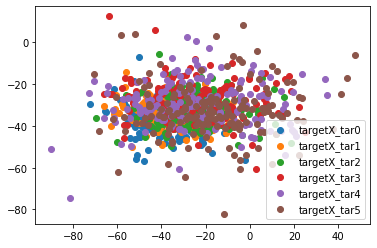

In [34]:
for x_tar, x_touch,y_tar, y_touch in zip(X_target_colnames, X_touch_colnames, Y_target_colnames, Y_touch_colnames):
    
    plt.scatter(df_serial[x_tar].sub(df_serial[x_touch].values), df_serial[y_tar].sub(df_serial[y_touch].values), label = x_tar)
    
plt.legend()

In [ ]:
# Sanity checks: 

In [ ]:
# Question: why are the first targets more off - because of the jump?

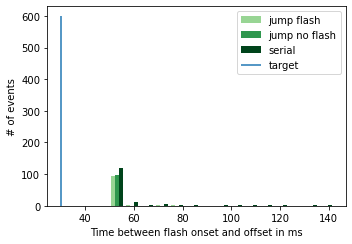

In [18]:
# some sanity checks

# check one: 
# variance between flash on and off

# get color map
cmap_flashDur = plt.cm.Greens(np.linspace(0.4,1,3))

# create plot
figFlash, axsFlash = plt.subplots(1,1, figsize = (5,3.5))
axsFlash.hist([df_jump[df_jump.flashShown == 1.0].flashOffTime - df_jump[df_jump.flashShown == 1.0].flashOnTime, df_jump[df_jump.flashShown == 0.0].flashOffTime - df_jump[df_jump.flashShown == 0.0].flashOnTime, df_serial.flashOffTime - df_serial.flashOnTime], color = cmap_flashDur, bins = 15, label = ['jump flash', 'jump no flash', 'serial']);
axsFlash.vlines(30, 0, 600, label = 'target');

axsFlash.legend()
axsFlash.set_xlabel('Time between flash onset and offset in ms')
axsFlash.set_ylabel('# of events')

plt.tight_layout()



### QUESTION 
by Richard Schweitzer

What screen refresh rate generates this pattern?

In [ ]:
# clean the data and plot again

clean_jump = df_jump[df_jump['flashOffTime'] - df_jump['flashOnTime'] <= 36]
clean_serial = df_serial[df_serial['flashOffTime'] - df_serial['flashOnTime'] <= 36]

# create figure
figFlashClean, axsFlashClean = plt.subplots(1,1, figsize = (5,3.5))
axsFlashClean.hist([clean_jump[clean_jump.flashShown == 1.0].flashOffTime - clean_jump[clean_jump.flashShown == 1.0].flashOnTime, clean_jump[clean_jump.flashShown == 0.0].flashOffTime - clean_jump[clean_jump.flashShown == 0.0].flashOnTime, clean_serial.flashOffTime - clean_serial.flashOnTime], color = cmap_flashDur, bins = 15, label = ['jump flash', 'jump no flash', 'serial']);
#axsFlashClean.vlines(30, 0, 600, label = 'target');

axsFlashClean.legend()
axsFlashClean.set_xlabel('Time between flash onset and offset in ms')
axsFlashClean.set_ylabel('# of events')


plt.tight_layout()

plt.savefig('../figures/flashdurationsclean.png')

The flash never happens too early, and sometimes happens a little too late (mostly one refresh).
There is no systematic variance in the delay between the trails.

In [ ]:
# check two: 
# do the reaction times look reasonable?

figRTs, axsRTs = plt.subplots(1,1, figsize = (5, 3.5), sharex = True, sharey = True)
cmap_respTime = plt.cm.Greens(np.linspace(0.4, 1, 2))

axsRTs.hist([df_jump.goTime, df_serial.touchOnTime_tar1], label = ['jump', 'serial'], color = cmap_respTime)

#axs1[1].hist([df_jump[df_jump.flashShown == 1.0].rt, df_jump[df_jump.flashShown == 0.0].rt], label = ['online FLASH', 'online NOFLASH']);
axsRTs.legend()
axsRTs.set_xlabel('Reaction time in ms')
axsRTs.set_ylabel('# of events')

plt.savefig('../figures/reactiontimes.png')

#axs1[1].legend();


### TODO: 
Plot the response times for all later points, too

In [ ]:
# check three: 
# what was the distribution of flash onsets across the trial?

plt.hist([df_jump[df_jump.flashShown == 1.0].flashOnTime, df_jump[df_jump.flashShown == 0.0].flashOnTime], label = ['jump FLASH', 'jump NOFLASH']);
plt.legend();

In [ ]:
# check four: 
# what was the distribution hand movement onsets relative to the flash?

plt.hist([df_jump[df_jump.flashShown == 1.0].goAfterFlashTime, df_jump[df_jump.flashShown == 0.0].goAfterFlashTime], label = ['jump FLASH', 'jump NOFLASH'], bins = 20);
plt.legend();

Note to myself: make the delay longer!

In [ ]:
# make a timeline
# columns we want to plot:
t_times = ['startTime', 'flashOnTime', 'flashOffTime']
t_actions = ['goTime'] 

# define a colormap
t_cm = plt.cm.viridis_r(np.linspace(0,1,len(t_times)))
time_fig, time_ax = plt.subplots(1,1, figsize = (14,4))

# loop through relevant times
for tim, c in zip(t_times, t_cm):
    # get and plot the mean
    mean_val = np.mean(df_jump[tim])
    time_ax.vlines(mean_val, 0, 5, color = c, label = tim, alpha = 0.5)

a_cm = plt.cm.jet(np.linspace(0,1,len(t_actions)))

# and timed actions
for ac, c in zip(t_actions, a_cm):
    # get and plot the mean
    mean_val = np.mean(df_jump[ac])
    time_ax.vlines(mean_val, 0, 5, color = c, label = ac, alpha = 0.5)
        
        
time_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');




In [ ]:
# same timeline for serial task
#create colormap
t_cm = plt.cm.viridis_r(np.linspace(0,1,len(time_colnames)))
time_fig2, time_ax2 = plt.subplots(1,1, figsize = (14,4))

# loop through all timed events
for tim, c in zip(time_colnames, t_cm):
    # get and plot mean
    mean_val = np.mean(df_serial[tim])
    time_ax2.vlines(mean_val, 0, 5, color = c, label = tim, alpha = 0.5)
    
time_ax2.vlines(np.mean(df_serial.flashOnTime), 0, 5, label = 'flash On')
time_ax2.vlines(np.mean(df_serial.flashOffTime), 0, 5, label = 'flash Off')

time_ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
# plot the x and y touches and lifts

plt.scatter(df_jump.cTouchX, df_jump.cTouchY, label = 'central')
plt.scatter(df_jump.sTouchX, df_jump.sTouchY, label = 'side')

# add the central points from meta data
plt.scatter(mdf.CenterX, mdf.CenterY, label = 'screenCenter')

# add description
plt.xlabel('size in px (1px = 0.026 cm)')

plt.legend();

In [ ]:
# center the x/y coordinates relative to the screen center
# for jump trials

# initialize column names
df_jump['cNormX'] = np.nan
df_jump['cNormY'] = np.nan
df_jump['sNormX'] = np.nan
df_jump['sNormY'] = np.nan

# get the data from each subject
for subject in np.unique(df_jump.subject):
    
    subjectOn = df_jump.subject == subject
    
    # get the mean of the first touches
    meanX = np.mean(df_jump[df_jump.subject == subject]['cTouchX'])
    meanY = np.mean(df_jump[df_jump.subject == subject]['cTouchY'])
    
    # subtract the mean value from the other values
    df_jump.loc[subjectOn, 'cNormX'] = df_jump[subjectOn]['cTouchX']-meanX
    df_jump.loc[subjectOn, 'cNormY'] = df_jump[subjectOn]['cTouchY']-meanY
    
    df_jump.loc[subjectOn, 'sNormX'] = df_jump[subjectOn]['sTouchX'] - meanX
    df_jump.loc[subjectOn, 'sNormY'] = df_jump[subjectOn]['sTouchY'] - meanY

In [ ]:
plt.scatter(df_jump.cNormX, df_jump.cNormY)
plt.scatter(df_jump.sNormX, df_jump.sNormY)

In [ ]:
# Same thing for serial trials

# for all targets that will be touched
t_cm = plt.cm.viridis_r(np.linspace(0,1,len(time_colnames)))

for tarX, tarY, c in zip(X_colnames,Y_colnames, t_cm):
    
    # plot
    plt.scatter(df_serial[tarX], df_serial[tarY], color = c)
    
# add screen center

plt.scatter(mdf.CenterX, mdf.CenterY, label = 'screenCenter', color = 'orange', s = 100)
plt.scatter(df_serial['button0-x'], df_serial['button0-y'], label = 'button 0', color = 'white', s = 100)

In [ ]:
# center relative to the first dot 
# for serial trials

# get the unique locations of the y button
for yLoc in np.unique(df_serial['button0-y']):
    
    # filter the data according to this values
    yLocOn = df_serial['button0-y'] == yLoc
    
    # get the mean value of this touch in the filtered data
    meanX = np.mean(df_serial[df_serial['button0-y'] == yLoc][X_colnames[0]])
    meanY = np.mean(df_serial[df_serial['button0-y'] == yLoc][Y_colnames[0]])
    
    # loop through all columns and center them around this mean
    for Xcol, Ycol in zip(X_colnames, Y_colnames):
        
        df_serial.loc[yLocOn, Xcol] = df_serial[yLocOn][Xcol]-meanX
        df_serial.loc[yLocOn, Ycol] = df_serial[yLocOn][Ycol]-meanY

In [ ]:
# Same thing for serial trials

# for all targets that will be touched
t_cm = plt.cm.Blues(np.linspace(0.2,1,len(time_colnames)))
# create a figure
figResp, axsResp = plt.subplots(2,1, figsize = (7,7), sharey = True) 

# go through all columns
for tarX, tarY, c in zip(X_colnames,Y_colnames, t_cm):
    # set different alpha levels for each subject
    for subject, alpha in zip(np.unique(df_serial.subject), np.linspace(0.5,1, len(np.unique(df_serial.subject)))):
    
        # plot
        axsResp[0].scatter(df_serial[df_serial.subject == subject][tarX], df_serial[df_serial.subject == subject][tarY], color = c, alpha = alpha)
# label
axsResp[0].set_xlabel('X-distance from first touch in px')
axsResp[0].set_ylabel('Y-distance from first touch in px')
axsResp[0].set_title('Responses in the Serial Paradigm')

axsResp[1].set_xlabel('X-distance from first touch in px')
axsResp[1].set_ylabel('Y-distance from first touch in px')
axsResp[1].set_title('Responses in the Jump Paradigm');

plt.tight_layout();

In [ ]:
# clean xy coordinate that are not centered around 0
# for both tasks

df_jump.drop(df_jump[abs(df_jump.cNormX)>100].index, inplace = True)
df_jump.drop(df_jump[abs(df_jump.cNormY)>100].index, inplace = True)
df_jump.drop(df_jump[abs(df_jump.sNormY)>100].index, inplace = True)


In [ ]:
# set new colormap for jump responses
points_cm = plt.cm.Blues(np.linspace(0.2,1,4))

# plot all locations
axsResp[1].scatter(df_jump.cNormX, df_jump.cNormY, color = points_cm[0])
axsResp[1].scatter(df_jump[df_jump.stimJumped==False].sNormX, df_jump[df_jump.stimJumped==False].sNormY, color = points_cm[1])

axsResp[1].scatter(df_jump[(df_jump.stimJumped==True) & (df_jump.inwards == True)].sNormX, df_jump[(df_jump.stimJumped==True)  & (df_jump.inwards == True)].sNormY, color = points_cm[2])
axsResp[1].scatter(df_jump[(df_jump.stimJumped==True) & (df_jump.inwards == False)].sNormX, df_jump[(df_jump.stimJumped==True)  & (df_jump.inwards == False)].sNormY, color = points_cm[3])

plt.tight_layout();

In [ ]:
# save the touch response figure
figResp
figResp.savefig('../figures/touchlocations.png')


In [ ]:
figResp

In [ ]:
# look for dips in the movement rate

figRTs, axsRTs = plt.subplots(3,1, figsize = (15, 5), sharex = True, sharey = True)

df_flash = df_serial[np.isnan(df_serial.flashOnTime) == False]

# plot reaction time distributions relative to regular onset

regRTs = [df_flash[x] for x in time_colnames]
axsRTs[0].hist(regRTs, bins = 25, color = t_cm);

# plot reaction time distribution relative to random values
np.random.seed(1111)
randT = np.random.sample(len(df_flash.index))
randT = randT * 1000
df_flash['randFlashOn'] = randT 

randRTs = [df_flash[x] - randT for x in time_colnames]
axsRTs[1].hist(randRTs, bins = 25, color = t_cm);

# plot reaction time distributions relative to flash onset
flashRTs = [df_flash[x] - df_flash.flashOnTime for x in time_colnames]
axsRTs[2].hist(flashRTs, bins = 25, color = t_cm);


The quality control till here looks good. We need to add a few more questions to the participants (about the device) and need to correct the code that reads out the X and Y coordinates of stimuli on the screen.

Also, we might want to present the flash over a longer time, not only 250 ms

In [ ]:
# martin's serial inhibition code

def causRate(msOns, wbLock, waLock, nt):
    """

     analyse rate in causal time window

     input:    msOns   - microsaccade onset times
               wbLock  - window before lock
               waLock  - window after lock
               nt      - number of trials
    
     output:   rate    - microsaccade rate
               scale   - time axis
    
    12.12.2005 by Martin Rolfs
    21.06.2021 translated to python by Clara Kuper
    """
    
    # check how many trials these values came from
    if type(nt)==int:
        nt = np.linspace(nt,nt,len(np.arange(-wbLock,waLock, 1)));
    elif len(nt)!=len(np.arange(-wbLock,waLock, 1)):
        error('nt must have the same length as -wbLock:waLock!')

    # alpha defines how much the distribution is shifted
    alpha = 1/20;
    # define empty arrays for scale and rate
    scale = [];
    rate = [];
    
    # loop through all time windows
    for t in np.arange(-wbLock,waLock):
        
        # save the time
        scale.append(t)
        # compute tau
        tau = t-msOns+1/alpha
        # filter tau as event 0/1
        tau = tau[tau>0]
        # get the number of saccades in a given window
        causal = alpha**2*tau*np.exp(-alpha*tau)
        # save the rate 
        rate.append(sum(causal)*1000/nt[len(scale)-1])
    
    return rate, scale

### UNDERSTANDING PROBLEM
Please define: what is this code doing?

In [ ]:
def plot_means_std(rates, scales, ax, cmap, labels):
    
    """
    plot the mean value and standart errors around
    
    INPUT: 
    rates: the values on which error and mean are computed (an array of arrays!)
    scales: the x value against which they are plotted (an array of arrays!)
    ax: the figure axis on which we plot
    cmap: the color scheme to be used
    labels: the labels for the legend
    """
    
    # zip and loop through the arrays
    for rate, scale, c, l in zip(rates,scales, cmap, labels):
        
        # compute mean
        mu = np.array(rate, dtype = np.float64).mean(axis=0)
        # compute error
        sigma = np.array(rate, dtype = np.float64).std(axis=0)
        # plot mean
        ax.plot(scale, mu, lw=1, color = c, label = l)
        # plot error
        ax.fill_between(scale, mu+sigma, mu-sigma, color = c, alpha = 0.5)

In [ ]:
# compute and plot saccade rates
rates_onset = []
rates_random = []
rates_flash = []

for s in subjects:
    
    df_s = df_flash[df_flash.subject == s]
    
    # aligned to the original 0
    serial_onsets_start = [df_s[x].values for x in time_colnames]
    serial_onsets_start = np.array(serial_onsets_start).flatten()
    serial_start, scale_start = causRate(serial_onsets_start, 0, 1000, len(df_s.index))

    # aligned to a random onset
    serial_onsets_random = [df_s[x].values - df_s['randFlashOn'].values for x in time_colnames]
    serial_onsets_random = np.array(serial_onsets_random).flatten()
    serial_random, scale_random = causRate(serial_onsets_random, 1000, 1000, len(df_s.index))

    # aligned to flash onset
    serial_onsets_flash = [df_s[x].values - df_s['flashOnTime'].values for x in time_colnames]
    serial_onsets_flash = np.array(serial_onsets_flash).flatten()
    serial_flash, scale_flash = causRate(serial_onsets_flash, 1000, 1000, len(df_s.index))

    # put all subjects in one list
    rates_onset.append(serial_start)
    rates_random.append(serial_random)
    rates_flash.append(serial_flash)

    
# initialize figure    
figRate, axsRate = plt.subplots(2,1, figsize = (7, 5))
cmap_flashOnOff = shiftcmp(np.linspace(0.1,0.8,2))

# plot on the figure
plot_means_std([rates_onset], [scale_start], axsRate[0], plt.cm.Blues(np.linspace(0.8,0.9,1)), ['from onset'])
plot_means_std([rates_flash, rates_random], [scale_random, scale_flash], axsRate[1], cmap_flashOnOff, ['flash', 'random'])

# add titles and stuff
axsRate[0].set_title('Touch responses after onset')
axsRate[1].set_title('Touch responses after flash')


axsRate[0].set_xlabel('Time after first touch in ms')
axsRate[1].set_xlabel('Time after flash in ms')

axsRate[0].set_ylabel('Movement onset rate')
axsRate[1].set_ylabel('Movement onset rate')


axsRate[1].legend()

plt.tight_layout()

plt.savefig('../figures/responseratesserial.png')

In [ ]:
# make a larger zoom window
figZoom, axsZoom = plt.subplots(1,1, figsize = (7, 3.5))

plot_means_std([[fr[1000:1200] for fr in rates_flash], [rr[1000:1200] for rr in rates_random]], [scale_random[1000:1200], scale_flash[1000:1200]], axsZoom, cmap_flashOnOff, ['flash', 'random'])
axsZoom.set_title('Zoom on responses after flash')
axsZoom.set_xlabel('Time after flash in ms')

plt.tight_layout()
plt.savefig('../figures/zoomedresponserates.png')


In [ ]:
# same analysis for liftts rather than touches
# aligned to the original 0
serial_offsets_start = [df_flash[x].values for x in lift_colnames]
serial_offsets_start = np.array(serial_onsets_start).flatten()
serialoff_start, scaleoff_start = causRate(serial_onsets_start, 0, 1000, len(df_flash.index)*5)

# aligned to a random onset
serial_offsets_random = [df_flash[x].values - df_flash['randFlashOn'].values for x in lift_colnames]
serial_offsets_random = np.array(serial_onsets_random).flatten()
serialoff_random, scaleoff_random = causRate(serial_onsets_random, 1000, 1000, len(df_flash.index)*5)

# aligned to flash onset
serial_offsets_flash = [df_flash[x].values - df_flash['flashOnTime'].values for x in lift_colnames]
serial_offsets_flash = np.array(serial_onsets_flash).flatten()
serialoff_flash, scaleoff_flash = causRate(serial_onsets_flash, 1000, 1000, len(df_flash.index)*5)


figRate, axsRate = plt.subplots(2,1)
axsRate[0].plot(scaleoff_start, serialoff_start)
axsRate[1].plot(scaleoff_random, serialoff_random, label = 'random')
axsRate[1].plot(scaleoff_flash, serialoff_flash, label = 'flash')

axsRate[1].legend();

In [ ]:
# same rate analysis for jump trials

# compute and plot saccade rates

# aligned to the original 0
rate_start_jump, scale_start_jump = causRate(df_jump.goTime, 0, 500, len(df_jump.index)*5)

# aligned to a random onset
rate_random_jump, scale_random_jump = causRate(df_jump[df_jump.flashShown == False].goTime - df_jump[df_jump.flashShown == False].flashOnTime, 500, 500, len(df_jump[df_jump.flashShown == True].index)*5)

# aligned to flash onset
rate_flash_jump, scale_flash_jump = causRate(df_jump[df_jump.flashShown == True].goTime - df_jump[df_jump.flashShown == True].flashOnTime, 500, 500, len(df_jump[df_jump.flashShown == True].index)*5)

# plot
figRateJump, axsRateJump = plt.subplots(2,1)
axsRateJump[0].plot(scale_start_jump, rate_start_jump, color = points_cm[3])
axsRateJump[1].plot(scale_random_jump, rate_random_jump, label = 'random', color = points_cm[1])
axsRateJump[1].plot(scale_flash_jump, rate_flash_jump, label = 'flash', color = points_cm[0])

axsRateJump[1].legend();

In [ ]:
# finer analysis of the plot above: split by condition (jump or not)

df_jumpFlash = df_jump[df_jump.flashShown == True]
df_jumpNoFlash = df_jump[df_jump.flashShown == False]

# aligned to NoFlash
rate_noflashshift_jump, scale_noflashshift_jump = causRate(df_jumpNoFlash[df_jumpNoFlash.stimJumped == True].goTime - df_jumpNoFlash[df_jumpNoFlash.stimJumped == True].flashOnTime, 0, 500, len(df_jumpNoFlash[df_jumpNoFlash.stimJumped == True].index)*5)
rate_noflashnoshift_jump, scale_noflashnoshift_jump = causRate(df_jumpNoFlash[df_jumpNoFlash.stimJumped == False].goTime - df_jumpNoFlash[df_jumpNoFlash.stimJumped == False].flashOnTime, 0, 500, len(df_jumpNoFlash[df_jumpNoFlash.stimJumped == False].index)*5)

# aligned to Flash
rate_flashshift_jump, scale_flashshift_jump = causRate(df_jumpFlash[df_jumpFlash.stimJumped == True].goTime - df_jumpFlash[df_jumpFlash.stimJumped == True].flashOnTime, 0, 500, len(df_jumpFlash[df_jumpFlash.stimJumped == True].index)*5)
rate_flashnoshift_jump, scale_flashnoshift_jump = causRate(df_jumpFlash[df_jumpFlash.stimJumped == False].goTime - df_jumpFlash[df_jumpFlash.stimJumped == False].flashOnTime, 0, 500, len(df_jumpFlash[df_jumpFlash.stimJumped == False].index)*5)

# plot
figRateShifts, axsRateShifts = plt.subplots(2,1, sharex = True, sharey = True)
axsRateShifts[0].plot(scale_noflashshift_jump, rate_noflashshift_jump, label = 'shift', color = points_cm[3])
axsRateShifts[0].plot(scale_noflashnoshift_jump, rate_noflashnoshift_jump, label = 'no shift', color = points_cm[2])
                                                           
axsRateShifts[1].plot(scale_flashshift_jump, rate_flashshift_jump, label = 'shift', color = points_cm[0])
axsRateShifts[1].plot(scale_flashnoshift_jump, rate_flashnoshift_jump, label = 'no shift', color = points_cm[1])

axsRateShifts[0].legend();
axsRateShifts[1].legend();

In [ ]:
def get_rate_cond(data, std_by, condition_col, time_col):
    
    """
    extracts the causal rate for conditions that are true or false
    
    INPUT:
    data: the data frame from where the condition is extracted
    std_by: the column that tells us across which dimension we compute standart errors
    condition_col: the condition that should be true or fals
    time_col: the column that contains the actual value from where we want to extract rates
    
    
    OUTPUT: a list of rates and scales for true and false values
    """
    
    # initialize arrays
    cond_true = []
    cond_false = []
    
    # get the unique values of the dimension used for std
    by_param = np.unique(data[std_by])
    
    # loop through all the istances used for averaging
    for param in by_param:
        
        # extract the data
        df_p = data[data[std_by] == param]
        # filter the df according to the condition
        df_true = df_p[df_p[condition_col] == True]
        df_false = df_p[df_p[condition_col] == False]
        
        # get the rate and the scales
        rate_true, scale_true = causRate(df_true[time_col], 0, 500, len(df_true.index))
        rate_false, scale_false = causRate(df_false[time_col], 0, 500, len(df_false.index))
        
        # collect the rates in one list
        cond_true.append(rate_true)
        cond_false.append(rate_false)
        
    return cond_true, cond_false, scale_true, scale_false
        

# flash/no flash -> differences & subject interval
flash_rate, noflash_rate, flash_scale, noflash_scale = get_rate_cond(df_jump, 'subject', 'flashShown', 'goAfterFlashTime')

# shift/no shift -> differences & subject interval
shift_rate, noshift_rate, shift_scale, noshift_scale = get_rate_cond(df_jump, 'subject', 'stimJumped', 'goAfterFlashTime')


fig, ax = plt.subplots(1, 2, figsize = (10,5), sharex = True, sharey = True)
cmap_flashOnOff = shiftcmp(np.linspace(0.1,0.8,2))
cmap_shiftOnOff = plt.cm.RdGy(np.linspace(0.1,0.7,2))
plot_means_std([flash_rate, noflash_rate], [flash_scale, noflash_scale], ax[0], cmap_flashOnOff, ['flash', 'no flash'])
plot_means_std([shift_rate, noshift_rate], [shift_scale, noshift_scale], ax[1], cmap_shiftOnOff, ['shift', 'no shift'])

ax[0].legend()
ax[1].legend()

ax[0].set_title('Effect of flash onset')
ax[1].set_title('Effect of target shift')

ax[0].set_xlabel('Time since flash in ms')
ax[1].set_xlabel('Time since flash in ms')

ax[0].set_ylabel('Movement onset rate')

plt.tight_layout()
plt.savefig('../figures/responseratesjump.png')

In [ ]:
# single figures of the flash/noflash contrast above for illustration
figSolo, axsSolo = plt.subplots(1,2, figsize = (5,2.5))
plot_means_std([flash_rate], [flash_scale], axsSolo[0], cmap_flashOnOff, ['flash', 'no flash'])
plot_means_std([noflash_rate], [noflash_scale], axsSolo[1], shiftcmp(np.linspace(0.8,0.8,1)), ['flash', 'no flash'])

axsSolo[0].set_title('flash')
axsSolo[1].set_title('no flash')

axsSolo[0].set_ylabel('movement rate')
axsSolo[1].set_ylabel('movement rate')

axsSolo[0].set_xlabel('time in ms')
axsSolo[1].set_ylabel('time in ms')


plt.tight_layout()
plt.savefig('../figures/individualflash.png')

In [ ]:
# compute the interaction of shift/noshift in flash and no flash trials
flash_df = df_jump[df_jump.flashShown == True]
noflash_df = df_jump[df_jump.flashShown == False]

# get the rates and scales
flash_shift_rate, flash_noshift_rate, flash_shift_scale, flash_noshift_scale = get_rate_cond(flash_df, 'subject', 'stimJumped', 'goAfterFlashTime')
noflash_shift_rate, noflash_noshift_rate, noflash_shift_scale, noflash_noshift_scale = get_rate_cond(noflash_df, 'subject', 'stimJumped', 'goAfterFlashTime')

# create the figure
fig2, ax2 = plt.subplots(1, 2, figsize = (10,5), sharex = True, sharey = True)

# plot with std
plot_means_std([flash_shift_rate, flash_noshift_rate], [flash_shift_scale, flash_noshift_scale], ax2[0], cmap_shiftOnOff, ['shift', 'no shift'])
plot_means_std([noflash_shift_rate, noflash_noshift_rate], [noflash_shift_scale, noflash_noshift_scale], ax2[1], cmap_shiftOnOff, ['shift', 'no shift'])

ax2[0].legend()
ax2[1].legend()
ax2[0].set_title('Flash Present')
ax2[1].set_title('Flash Absent')

ax2[0].set_xlabel('Time since flash in ms')
ax2[1].set_xlabel('Time since flash in ms')

ax2[0].set_ylabel('Movement onset rate')

plt.tight_layout()
plt.savefig('../figures/responseratesinteractionjump.png')


### COMMENT 
by Martin Rolfs:

would make sense if the movements were initiated faster after a shift & flash: the flash facilitates the reaction to behaviorally relevant stimuli

In [ ]:
# visualize dependence soa/error to new target
# extract the error size 
# assign the distance of the target relative to the center. This assignment step is necessary now, 
# because the readout from the experiment didn't work. But it will not be necessary in later versions
# initilize the column
df_jump['targetXPos'] = np.nan

# define the condition - jump or not
for s in np.unique(df_jump.stimJumped):
    # inwards or outwards shift
    for d in np.unique(df_jump.inwards):
        # left or right
        # get the indeces
        idx = df_jump[(df_jump.stimJumped == s) & (df_jump.inwards == d)].index
        # this is the standart target position
        tar = 200
        # the position differs when there was a shift
        if s == 1.0:
            # the shift was either 50 px inwards or outwards
            if d == 1.0:
                tar -= 50
            else:
                tar += 50

        # save the values to the df
        df_jump.loc[idx, 'targetXPos'] = tar
        
# the error ist the distance between the actual target and the touch response
df_jump['sErrorX'] = abs(df_jump['sNormX']) - df_jump['targetXPos']
            
# same assignment to the serial task
# the distance of individual dots
pointDist = 80

# go through all targets

error_colnames = []

for col in range(0,6):
    
    # initialize column names
    colname_error = 'xError_tar{}'.format(col)
    error_colnames.append(colname_error)
    colname_response = X_colnames[col]
    # substract the position of the dot from the response
    df_flash[colname_error] = df_flash[colname_response] - (col * pointDist)

In [ ]:
# check the distribution of X errors in the jump task
plt.hist(df_jump.sErrorX);

In [ ]:
targetErrors = [df_flash[x] for x in error_colnames]

# check the distribution of x errors in the serial task
plt.hist(targetErrors, label = ['0','1', '2', '3', '4', '5'])
plt.legend();

In [ ]:
def moving_window_mean(time_series, data, stepsize, average_over = False, use_absolute = False, on = 1000, off = 1000):
    
    """
    exctract the mean values for each window in a moving mean 
    
    INPUT:
    time_series: the timepoints when sth occures
    data: the data points to be averaged, same temporal order as the time_series
    stepsize: the size of each step
    average_over: the size of each chunk that's averaged over. defaults to the value of stepsize
    use_absolut: if the average should be computed on absolute values
    
    OUTPUT:
    data frame with time onsets and mean values
    
    """
    
    # set the size of the averaging window, if necessary
    if not average_over:
        
        average_over = stepsize
    
    elif average_over < stepsize:
        # warn if the size of the window is too small
        print('watch out, your step size does not cover a full time window.')
        
    # initialize the time array
    window_array = np.arange(-1*on, off, stepsize)
    # intialize the pd array
    mean_array = pd.DataFrame(columns = ['timewindow', 'meanvalue'], index = window_array)
    mean_array.timewindow = window_array
    # loop through all time onsets
    for w in window_array:
        
        # define a mask for the time frame
        time_mask = (time_series >= w) & (time_series < w+average_over)
        # apply the mask to the data
        data_masked = data[time_mask]
        
        # check if the mask is empty
        if not data_masked.size == 0:
            
            # get the mean value
            if use_absolute:
                mean_val =  np.mean(abs(data_masked))
            else:
                mean_val =  np.mean(data_masked)
                
            mean_array.loc[w, 'meanvalue'] = mean_val
            
        else:
            mean_array.loc[w, 'meanvalue'] = np.nan
        
    return mean_array

In [ ]:
# check if the error columns look reasonable
df_flash[error_colnames]

In [ ]:
errors_start = []
errors_flash = []
errors_random = []

start = 1000
end = 1000

for s in subjects:
    
    df_s = df_flash[df_flash.subject == s]
    
    # extract the values for serial errors and flatten them
    serial_errors = [df_s[x].values for x in error_colnames]
    serial_errors = np.array(serial_errors).flatten()
    
    onset_start = [df_s[x].values for x in time_colnames]
    onset_start = np.array(onset_start).flatten()

    # aligned to a random onset
    onset_random = [df_s[x].values - df_s['randFlashOn'].values for x in time_colnames]
    onset_random = np.array(onset_random).flatten()

    # aligned to flash onset
    onset_flash = [df_s[x].values - df_s['flashOnTime'].values for x in time_colnames]
    onset_flash = np.array(onset_flash).flatten()
        
    # compute the moving average from trial onset, relative to flash onset and to a random value
    mean_error_start = moving_window_mean(onset_start, serial_errors, 20, 100, on = start, off = end)
    mean_error_flash = moving_window_mean(onset_flash, serial_errors, 20, 100, on = start, off = end)
    mean_error_random = moving_window_mean(onset_random, serial_errors, 20, 100, on = start, off = end)
    
    errors_start.append(mean_error_start.meanvalue.values)
    errors_flash.append(mean_error_flash.meanvalue.values)
    errors_random.append(mean_error_random.meanvalue.values)
    
# plot the results
fig3, ax3 = plt.subplots(1,1, figsize = (7, 3.5))
plot_means_std([errors_flash, errors_random], [mean_error_flash.timewindow.values, mean_error_random.timewindow.values], ax3, cmap_flashOnOff, ['flash', 'no flash'])
ax3.legend()
ax3.set_title('Landing error')
ax3.set_xlabel('Time after flash in ms')
ax3.set_ylabel('Error in px')

plt.tight_layout()

plt.savefig('../figures/errorsserial.png')

In [ ]:
# in the jump trial, look at SOA - error relation

mean_error_SOA = moving_window_mean(df_jump.goTime - df_jump.flashOnTime, df_jump.sErrorX, 1, 20)
plt.plot(mean_error_SOA.timewindow, mean_error_SOA.meanvalue)
plt.xlim(-20,300);

In [ ]:
# plot the error/soa for different categories


def get_condition_means(data):
    
    """
    VERY specific function that splits my jump data set into conditions, computes a moving window mean and returns the result
    
    INPUT:
    data: the data frame to be split
    OUTPUT:
    the moving window means for split data
    """

    jdf_FSI = data[(data.flashShown == True) & (data.stimJumped == True) & (data.inwards == True)]
    jdf_FSO = data[(data.flashShown == True) & (data.stimJumped == True)  & (data.inwards == False)]

    jdf_F = data[(data.flashShown == True) & (data.stimJumped == False)]

    jdf_SI = data[(data.flashShown == False) & (data.stimJumped == True) & (data.inwards == True)]
    jdf_SO = data[(data.flashShown == False) & (data.stimJumped == True) & (data.inwards == False)]

    jdf = data[(data.flashShown == False) & (data.stimJumped == False)]

    mean_error_FSI = moving_window_mean(jdf_FSI.goAfterFlashTime, jdf_FSI.sErrorX, 20, 100, on = 0, off = 250)
    mean_error_FSO = moving_window_mean(jdf_FSO.goAfterFlashTime, jdf_FSO.sErrorX, 20, 100, on = 0, off = 250)

    mean_error_SI = moving_window_mean(jdf_SI.goAfterFlashTime, jdf_SI.sErrorX, 20, 100, on = 0, off = 250)
    mean_error_SO = moving_window_mean(jdf_SO.goAfterFlashTime, jdf_SO.sErrorX, 20, 100, on = 0, off = 250)

    mean_error_F = moving_window_mean(jdf_F.goAfterFlashTime, jdf_F.sErrorX, 20, 100, on = 0, off = 250)
    mean_error = moving_window_mean(jdf.goAfterFlashTime, jdf.sErrorX, 20, 100, on = 0, off = 250)
    
    return mean_error_FSI, mean_error_FSO, mean_error_SI, mean_error_SO, mean_error_F, mean_error

# initialize arrays for the conditions
FSI = []
FSO = []
SI = []
SO = []
F = []
N = []

# loop through all subjects
for s in subjects:
    
    # filter the data
    sdf = df_jump[df_jump.subject ==s]
    
    # get the moving mean per subject
    sFSI, sFSO, sSI, sSO, sF, sN = get_condition_means(sdf)
    
    # collect in array
    FSI.append(sFSI.meanvalue.values)
    FSO.append(sFSO.meanvalue.values)
    SI.append(sSI.meanvalue.values)
    SO.append(sSO.meanvalue.values)
    F.append(sF.meanvalue.values)
    N.append(sN.meanvalue.values)

# create figure
fig4, ax4 = plt.subplots(1,2, sharex = True, sharey = True, figsize = (7,3.5))

# create colormap
cmap_shiftInOut = plt.cm.RdGy(np.linspace(0.1,0.8,4))

# show errors on figure
plot_means_std([FSI, FSO, F], [sFSI.timewindow.values, sFSO.timewindow.values, sF.timewindow.values], ax4[0], cmap_shiftInOut, ['shiftIn', 'shiftOut', 'no shift'])
plot_means_std([SI, SO, N], [sSI.timewindow.values, sSO.timewindow.values, sN.timewindow.values], ax4[1], cmap_shiftInOut, ['shiftIn', 'shiftOut', 'no shift'])

#plot_means_std([FSO, F], [sFSO.timewindow.values, sF.timewindow.values], ax4[1,0], cmap_shiftOnOff, ['shift', 'no shift'])
#plot_means_std([SO, N], [sSO.timewindow.values, sN.timewindow.values], ax4[1,1], cmap_shiftOnOff, ['shift', 'no shift'])
ax4[0].set_title('Flash present')
ax4[1].set_title('Flash absent')

ax4[0].set_xlabel('Time after flash in ms')
ax4[1].set_xlabel('Time after flash in ms')

ax4[0].set_ylabel('Error in px')

ax4[0].legend()
ax4[1].legend()

plt.tight_layout()

plt.savefig('../figures/errorsjump.png')


### COMMENT
by Martin Rolfs: why are the error bars larger in the present condition than in the absent condition?